## 1. Load the dataset

To start, run the following cells to load the dataset and import the necessary libraries. The dataset has `X`, a Pandas DataFrame containing all the features (categorical features dealt with), and `y`, a Pandas Series (a 1-dimensional DataFrame) with the label (what cut a given diamond is) converted into simple numerical categories (to allow some code later to work properly). Finally, run the last cell to visualize `X` and `y`.

In [ ]:
import pandas as pd
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.tree
import sklearn.metrics
import sklearn.ensemble
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = sns.load_dataset("diamonds")
display(df)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [ ]:
X = df.loc[:, df.columns != "cut"]
X = pd.get_dummies(X)
y = df.loc[:, "cut"]
codes = y.astype("category").cat.codes
y = codes

In [ ]:
display(X)
display(y)

,carat,depth,table,price,x,y,z,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


0        2
1        3
2        1
3        3
4        1
        ..
53935    2
53936    1
53937    4
53938    3
53939    2
Length: 53940, dtype: int8

## 2. Split into train, val, and test sets

Run the following code to split data into train, val, and test sets.

In [ ]:
def train_val_test_split(dataset):
  # Returns a tuple of 3 sub-datasets. 
  # The first 80% train, next 10% val, last 10% test.
  return np.split(dataset, [int(dataset.shape[0] * 0.8), int(dataset.shape[0] * 0.9)])

X_train, X_val, X_test = train_val_test_split(X)
y_train, y_val, y_test = train_val_test_split(y)

## 3. Create, fit, and evaluate a decision tree

Use sklearn's [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) class to create a decision tree, fit it to our train set, predict on the val set, and evaluate its F1 score.

In [ ]:
tree = sklearn.tree.DecisionTreeClassifier(random_state=19)
tree.fit(X_train, y_train)
yhat_val = tree.predict(X_val)

f1 = sklearn.metrics.f1_score(y_val, yhat_val, average="macro")
print(f1)

0.6148964228633955


Then, create and fit a second model with `max_depth=2`.

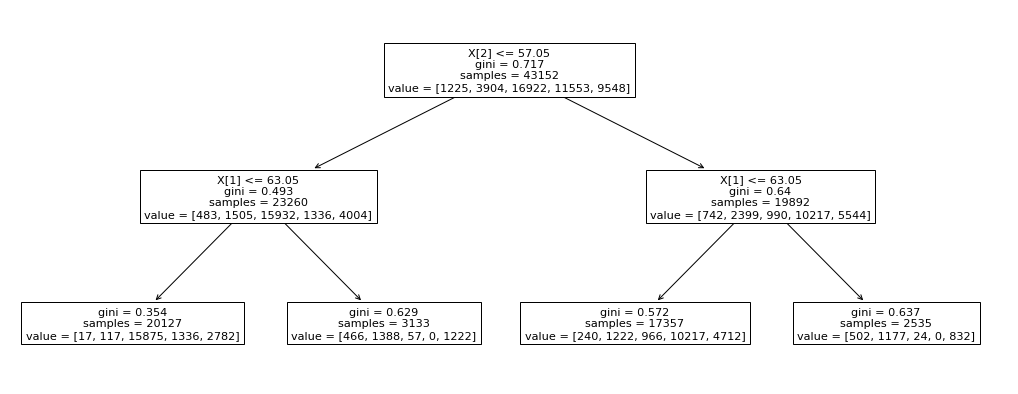

In [ ]:
model = sklearn.tree.DecisionTreeClassifier(max_depth=2, random_state=19)
model.fit(X_train, y_train)
plt.figure(figsize=(18, 7))
sklearn.tree.plot_tree(model)
plt.show()

## 1. Implement random forest algorithm

Implement random forest algorithm, only using the sklearn decision tree module.

Creates a class called `RandomForest` that has a constructor that takes a parameter `M_trees`, a `.fit()` method, and a `.predict()` method.

In [ ]:
import scipy

class RandomForest:

  def __init__(self, M_trees):
    self.M_trees = M_trees
    self.trees = []
    self.n_classes = None
  
  def fit(self, X, y):
    self.n_classes = len(np.unique(y))
    for i in range(self.M_trees):
      boot_indices = np.random.choice(np.arange(X.shape[0]), size=X.shape[0], replace=True)
      boot_X = X.iloc[boot_indices, :]
      boot_y = y.iloc[boot_indices]
      tree = sklearn.tree.DecisionTreeClassifier(random_state=19)
      tree.fit(boot_X, boot_y)
      self.trees.append(tree)

  def predict(self, X):
    preds = np.zeros((X.shape[0], self.M_trees))
    for t in range(len(self.trees)):
      tree = self.trees[t]
      pred = tree.predict(X)
      preds[:, t] = pred
    return scipy.stats.mode(preds, axis=1)[0]


Calls `RandomForest` class. Create a new instance, fit it to the train set, predict on the val set, and evaluate its performance as an F1 Score.

In [ ]:
# TODO
rf = RandomForest(10)
rf.fit(X_train, y_train)

yhat_val = rf.predict(X_val)
f1 = sklearn.metrics.f1_score(y_val, yhat_val, average="macro")
print(f1)

0.7089233452117355


## 2. Use sklearn's RandomForestClassifier

Using sklearn's [sklearn.ensemble.RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html), instead of implementing from scratch.

In [ ]:
# TODO
model = sklearn.ensemble.RandomForestClassifier(n_estimators=10, bootstrap=True, random_state=19)
model.fit(X_train, y_train)

yhat_val = model.predict(X_val)
f1 = sklearn.metrics.f1_score(y_val, yhat_val, average="macro")
print(f1)

0.6626120369832064
